<a href="https://colab.research.google.com/github/KhushalM1432/Deep-Learning/blob/main/6_Text_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification (Sentiment Analysis) - NLP (Natural Language Processing)
TFIDF - Term Frequency Inverse Document Frequency

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [3]:
import pandas as pd
df = pd.read_csv(url, sep = "\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Step 2 - Perform Basic Data Quality Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.isna().sum()

,0
Review,0
Liked,0


In [6]:
df.duplicated().sum()

np.int64(4)

In [7]:
df = df.drop_duplicates(keep = "first").reset_index(drop = True)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
991,I think food should have flavor and texture an...,0
992,Appetite instantly gone.,0
993,Overall I was not impressed and would not go b...,0
994,"The whole experience was underwhelming, and I ...",0


In [8]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Text Preprocessing

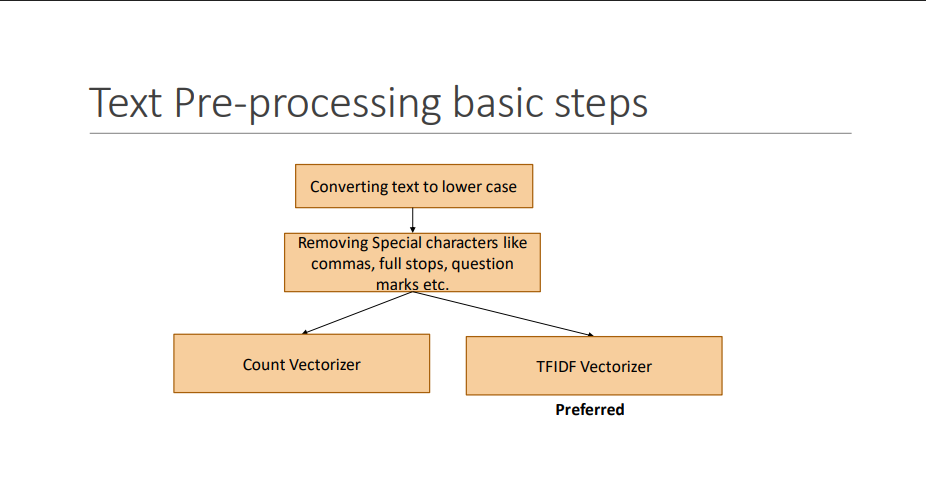

In [9]:
import re

### ^[a-z0-9] Whatever is not a-z or 0-9 or space replace it with blank

It will remove punctionationas like .,!?

In [10]:
def preprocess_text(text: str)->str:
  text = text.lower()
  text = re.sub("[^a-z0-9]","", text) # Make sure add space after a-z0-9
  return text

In [11]:
preprocess_text("Amazing... The taste was very, good!")

'amazingthetastewasverygood'

### Apply above on the DataFrame

In [12]:
df["pre"] = df["Review"].apply(preprocess_text)

In [13]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wowlovedthisplace
1,Crust is not good.,0,crustisnotgood
2,Not tasty and the texture was just nasty.,0,nottastyandthetexturewasjustnasty
3,Stopped by during the late May bank holiday of...,1,stoppedbyduringthelatemaybankholidayoffrickste...
4,The selection on the menu was great and so wer...,1,theselectiononthemenuwasgreatandsoweretheprices
...,...,...,...
991,I think food should have flavor and texture an...,0,ithinkfoodshouldhaveflavorandtextureandbothwer...
992,Appetite instantly gone.,0,appetiteinstantlygone
993,Overall I was not impressed and would not go b...,0,overalliwasnotimpressedandwouldnotgoback
994,"The whole experience was underwhelming, and I ...",0,thewholeexperiencewasunderwhelmingandithinkwel...


### Apply TFIDF Vectorizer on Preprocessed text

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(df["pre"]).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_pre.shape

(996, 995)

### Apply SVD(Singular Value Decomposition)

Reduces number of columns to required number of columns

(Extract import feature out of data)

In [17]:
from sklearn.decomposition import TruncatedSVD

In [18]:
# I want to extract 300 columns
n_components = 300

svd = TruncatedSVD(n_components)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red

array([[-5.28898407e-04, -5.91174362e-02,  3.27786878e-02, ...,
         5.56119024e-02,  2.96633973e-02, -6.74244838e-02],
       [ 4.16096271e-04, -2.09517156e-02, -6.40073576e-02, ...,
         1.74857339e-02,  2.37419943e-03, -1.04455098e-02],
       [-4.55710207e-04, -2.27460958e-02,  9.77515812e-03, ...,
         8.13279687e-03,  1.79027920e-02,  2.48516546e-05],
       ...,
       [ 4.41486290e-04, -3.96242143e-02,  2.31536124e-02, ...,
         1.94640348e-02, -1.61871918e-02,  2.73751001e-02],
       [ 4.07400502e-04, -4.76501523e-02, -3.63232333e-02, ...,
        -9.11334604e-03, -4.68568183e-02,  3.27149210e-03],
       [-7.14428226e-04,  1.63182298e-02,  6.22347027e-02, ...,
         3.30018505e-03, -5.10382408e-02,  8.39771429e-03]])

In [19]:
X_pre_red.shape

(996, 300)

### TFIFD -> SVD:LSA(Latent Semantic Analysis)

Train Test Split

In [20]:
Y = df[["Liked"]]

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre_red, Y, test_size = 0.2, random_state = 42)

In [22]:
xtrain

array([[-0.0007708 ,  0.04179095, -0.02408837, ..., -0.01779453,
        -0.00757224, -0.017942  ],
       [ 0.00126439, -0.0448226 ,  0.00813809, ...,  0.03737045,
         0.03119585, -0.03530371],
       [-0.00029765, -0.01286843,  0.04999056, ..., -0.01369128,
         0.00066474,  0.0481035 ],
       ...,
       [ 0.00128587,  0.07625467,  0.04721931, ...,  0.03661549,
         0.04453266, -0.04937552],
       [ 0.00074863,  0.00454506, -0.02378573, ...,  0.04220028,
        -0.04324868, -0.03194319],
       [-0.00034596,  0.05303119,  0.04463215, ..., -0.0219894 ,
        -0.00508252,  0.00153   ]])

In [23]:
ytrain.head()

,Liked
626,0
307,0
662,1
394,1
644,0


In [24]:
xtest

array([[-0.0001727 ,  0.00178304,  0.02396253, ...,  0.02371285,
        -0.01746129,  0.04806712],
       [-0.00179506, -0.03068092,  0.01645501, ..., -0.02457956,
         0.00892788,  0.05615813],
       [ 0.00059745,  0.02099912, -0.05538111, ..., -0.03191498,
        -0.00489123, -0.02262818],
       ...,
       [ 0.00041621, -0.01610578,  0.03830208, ..., -0.03879258,
         0.02182515, -0.00016207],
       [ 0.00124642,  0.01317735,  0.00848377, ..., -0.05925379,
         0.03326204, -0.06166338],
       [-0.00050296,  0.03063626, -0.00876409, ..., -0.03303835,
        -0.00138313, -0.02176979]])

In [25]:
ytest.head()

,Liked
832,1
970,0
96,1
587,0
450,0


In [26]:
xtrain.shape

(796, 300)

In [27]:
xtest.shape

(200, 300)

In [28]:
xtrain.shape[1]

300

### Build the Neural Network

1. L1 - Lasso (Penalty applied on absolute value of weights)
2. L2 - Ridge (Penalty applied on squared value of weights)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras import regularizers

In [30]:
model = Sequential(
    [
        Input(shape = (xtrain.shape[1],)),
        Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(64, activation = "relu", kernel_regularizer = regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1, activation = "sigmoid")
    ]
)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [33]:
es = EarlyStopping(patience = 10, restore_best_weights = True)

In [34]:
hist = model.fit(
    xtrain, ytrain,
    validation_data = (xtest, ytest),
    batch_size = 32,
    epochs = 200,
    callbacks = [es]
)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 334ms/step - accuracy: 0.4992 - loss: 2.9961 - val_accuracy: 0.4500 - val_loss: 2.1549
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4992 - loss: 1.9535 - val_accuracy: 0.4700 - val_loss: 1.4632
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5159 - loss: 1.3521 - val_accuracy: 0.4700 - val_loss: 1.0879
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5178 - loss: 1.0289 - val_accuracy: 0.4700 - val_loss: 0.8928
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5204 - loss: 0.8621 - val_accuracy: 0.4700 - val_loss: 0.7939
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5020 - loss: 0.7779 - val_accuracy: 0.4700 - val_loss: 0.7443
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5015 - loss: 0.7354 - val_accuracy: 0.4700 - val_loss: 0.7190
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5172 - loss: 0.7145 - val_accuracy: 0.4700 

### Evaluate Model

In [35]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5023 - loss: 0.6932


[0.6930760741233826, 0.5087939500808716]

In [36]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4475 - loss: 0.6944 


[0.6939349174499512, 0.4699999988079071]

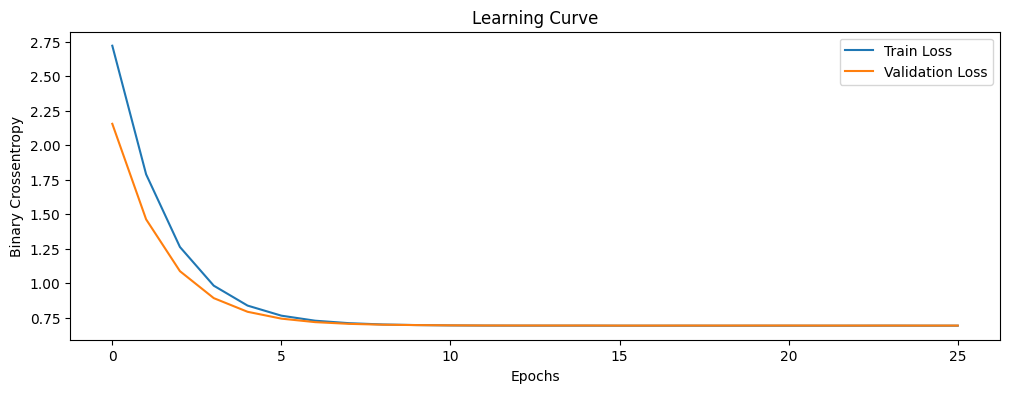

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [38]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0.5055169 ],
       [0.50551975],
       [0.50551456],
       [0.5055162 ],
       [0.5055185 ]], dtype=float32)

In [39]:
ypred_train = [1 if prob >= 0.5 else 0 for prob in yprob_train]
ypred_train[0:5]

[1, 1, 1, 1, 1]

In [40]:
ytrain.head()

,Liked
626,0
307,0
662,1
394,1
644,0


In [41]:
yprob_test = model.predict(xtest)
ypred_test = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[1, 1, 1, 1, 1]

In [42]:
ytest.head()

,Liked
832,1
970,0
96,1
587,0
450,0


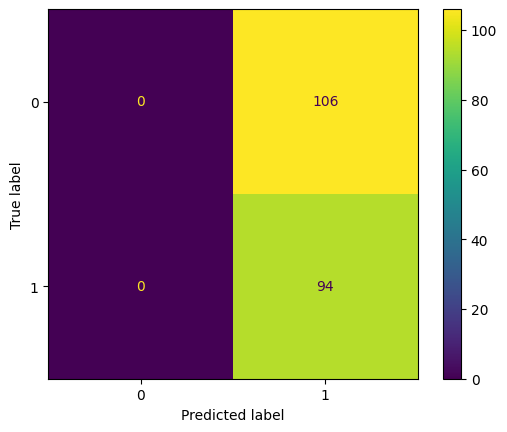

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.47      1.00      0.64        94

    accuracy                           0.47       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.22      0.47      0.30       200



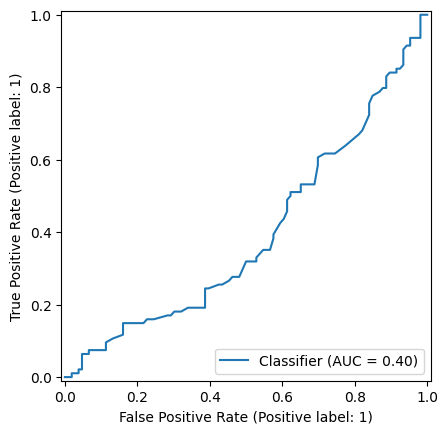

In [45]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)

### From above results i it clear that this model is a good model hece you can use it for out of sample prediction

Out of Sample Prediction

In [46]:
def predict_sentiment(text: str):
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  prob = model.predict(text_pre_red)
  sentiment = "positive" if prob >= 0.5 else "negative"
  return sentiment, prob

In [47]:
predict_sentiment("AmazingRestaurant...Really liked the taste of Pizza!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


('positive', array([[0.5055168]], dtype=float32))

In [48]:
predict_sentiment("Very Bad Service, I also did not like the ambience...")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


('positive', array([[0.5055168]], dtype=float32))

In [49]:
predict_sentiment("Incredible Taste, I enjoyed the starters and main course!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


('positive', array([[0.5055168]], dtype=float32))

### Save the Model and Preprocessors

In [50]:
tfidf

TfidfVectorizer()

In [51]:
svd

TruncatedSVD(n_components=300)

In [52]:
model

<Sequential name=sequential, built=True>

In [53]:
%pip install joblib

In [54]:
import joblib
joblib.dump(tfidf, "tfidf.joblib")

['tfidf.joblib']

In [55]:
joblib.dump(svd, "svd.joblib")

['svd.joblib']

In [56]:
model.save("Sentiment.keras")

### Opening above files

In [57]:
t = joblib.load("tfidf.joblib")
t

TfidfVectorizer()

In [58]:
s = joblib.load("svd.joblib")
s

TruncatedSVD(n_components=300)

In [59]:
from keras.models import load_model

In [60]:
m = load_model("Sentiment.keras")

In [61]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)